In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing necessary libararies for our model. 

In [2]:
cen2 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
cen2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We imported the datset using the pd.read and saved the same in a variable named cen. We have to predict the amount person is makin. We have categories in this column hence it is a classification problem. 

In [3]:
cen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Above the detailed information about the dataset. It shows that we have 32560 rows 15 columns their dtype. ALso, shwoing non null which shows how many null bvalues we have in the dataset. 

In [4]:
cen2.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
cen2.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can check that we don't have any null values in the dataset. 

In [6]:
cen2.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We can check that we have total 15 columns, out of which 9 columns are object dtype and rest are int

In [7]:
col = cen2.columns
col

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We assigned all the columns to variable col and printed all the columns of the dataset. 

We have changed the dtype of object columns to int. We called label encoder which encodes the object data to int

We can check that we have all numerical values in the dataset now. 

In [8]:
cen2.shape

(32560, 15)

Dataset is having 32560 Rows and 15 Columns. 

In [9]:
col

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Income', ylabel='count'>

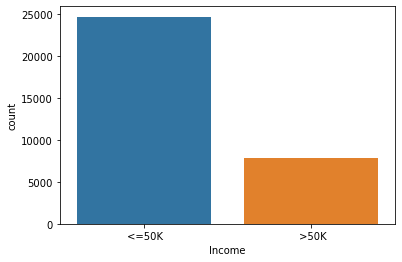

In [10]:
sns.countplot(cen2["Income"])

Graohical representation of the Income Column. We can cheack that we have categorical values in columns which makes this as classification problem. Also, we can check that va;ues are not equally distributed shows class imbalance. 

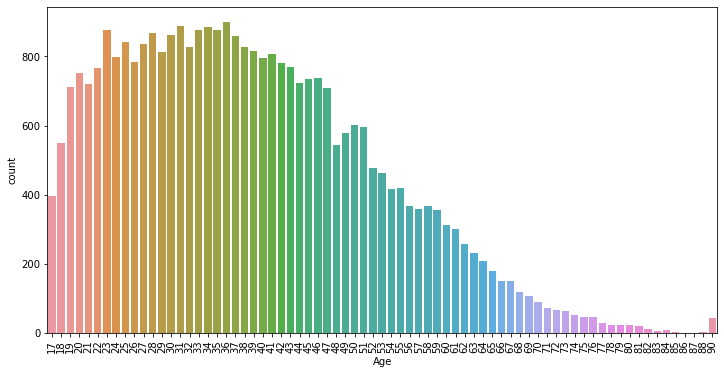

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Age"])
plt.show()

Above graphs that we have maximum person with age group 23 - 37

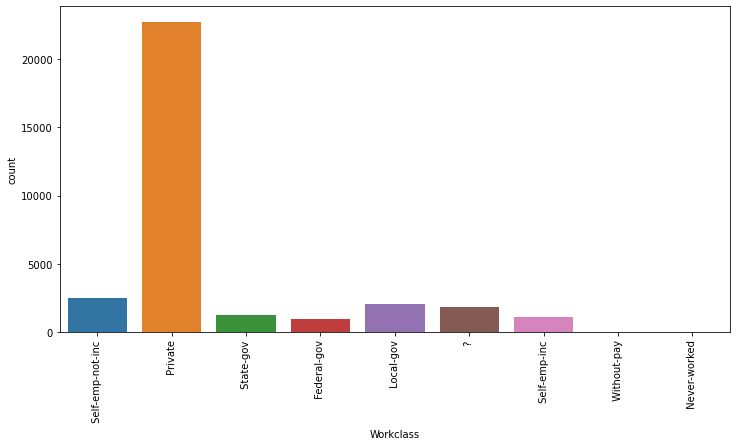

In [12]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Workclass"])
plt.show()

From the above graph we can say that we have most person from workclass 4. 

In [13]:
col

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Fnlwgt"])
plt.show()

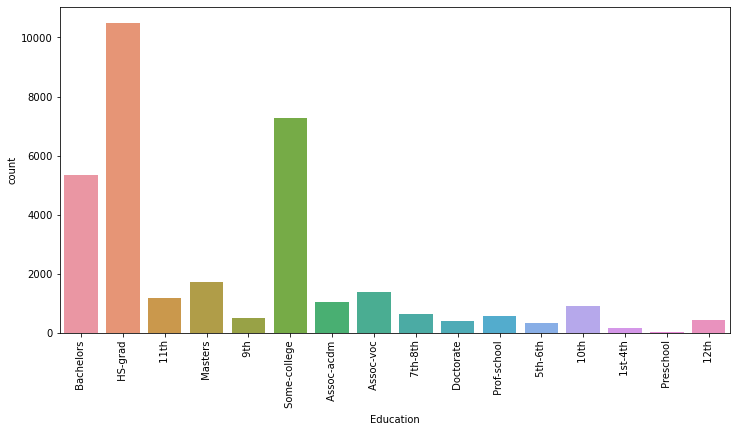

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Education"])
plt.show()

We can check that most of person are having their education as: - 

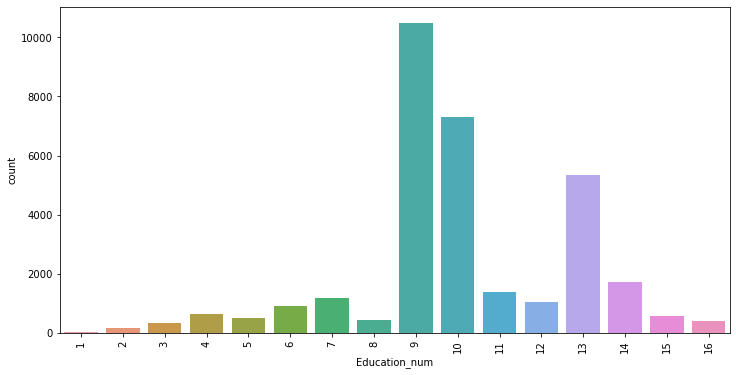

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Education_num"])
plt.show()

We ca check that we majority of person are having an education upto 9 and 10 

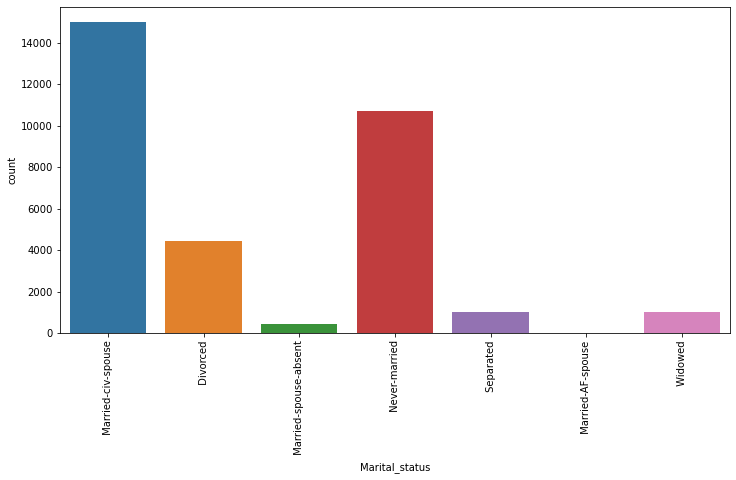

In [17]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Marital_status"])
plt.show()

From the above graph we can check that most of the persons are married and after that never married person have higher numbers. 

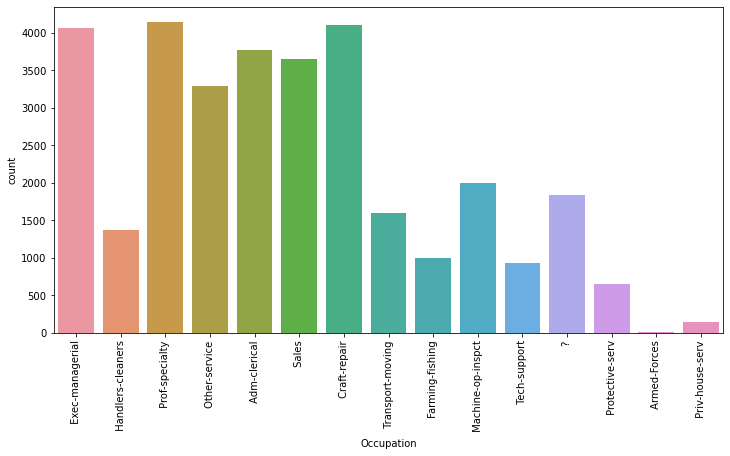

In [18]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Occupation"])
plt.show()

We can see that most of the persons are having an occupation as an excel managerial, prof speciality, other, adm clerical, sales and craft repair and fewer from other categories. 

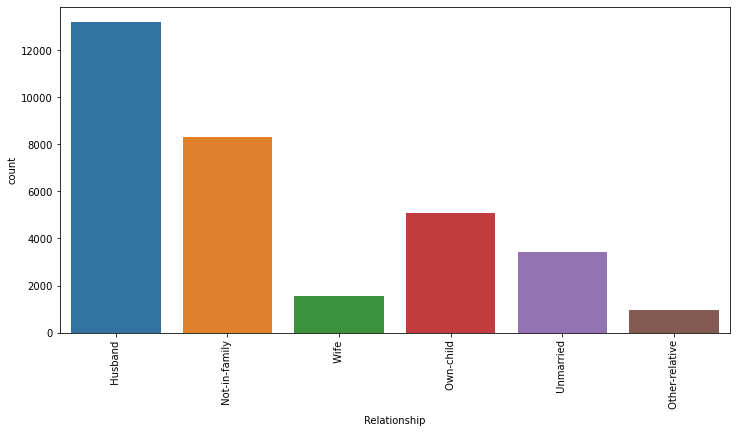

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Relationship"])
plt.show()

From the above graph we can see that most of the persons are married as they aee husbands and second are non in family means single. The column shares same information as of marital staus and we can drop this. Will checl later

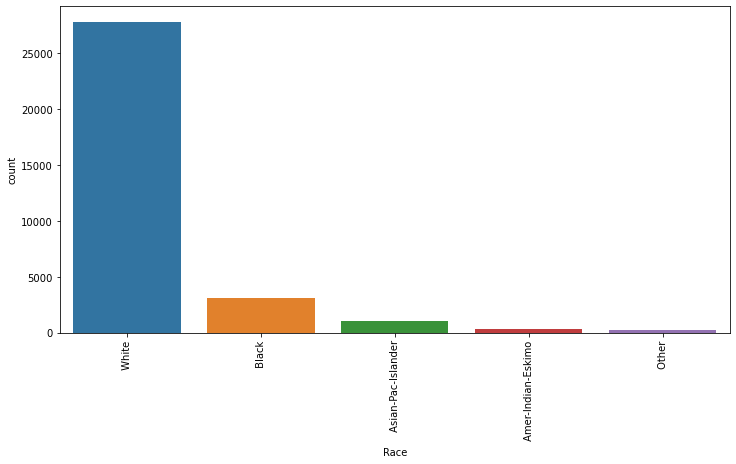

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Race"])
plt.show()

We can say that most of the white people are having jobs as their count is higher than other races.

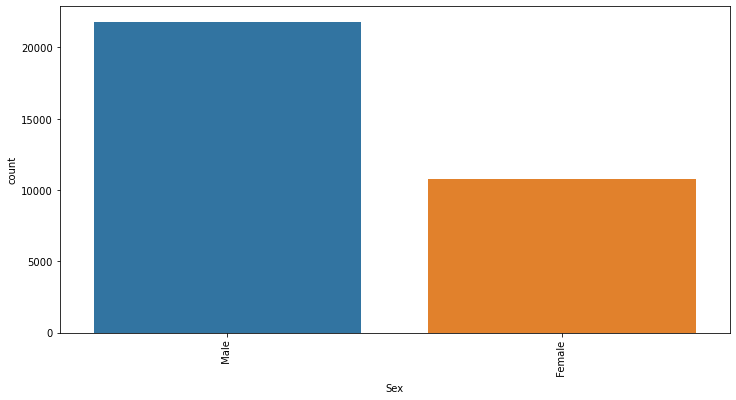

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Sex"])
plt.show()

We mostly have males as compoared to female in our dataset. 

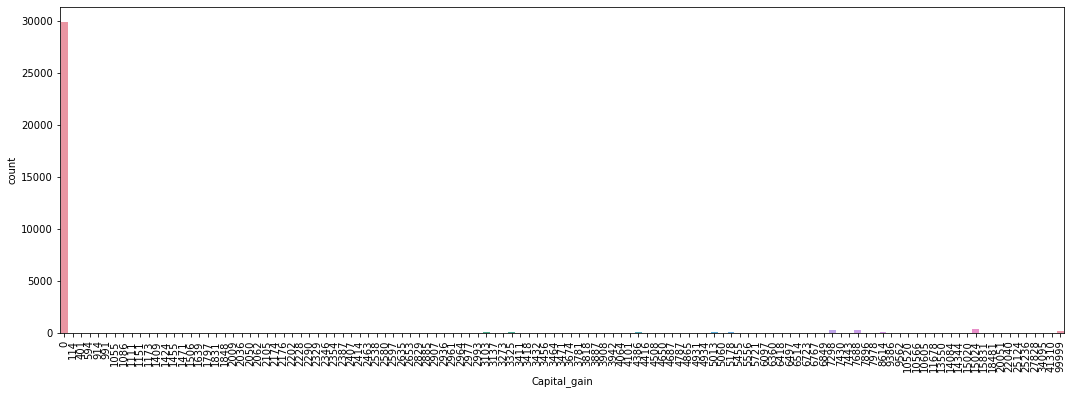

In [22]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Capital_gain"])
plt.show()

We can see that maximum count is from the 0 range

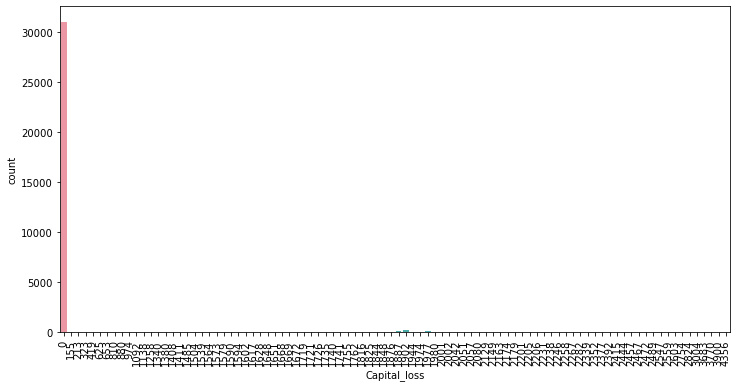

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Capital_loss"])
plt.show()

Who earned more capital lost more capital same range 0

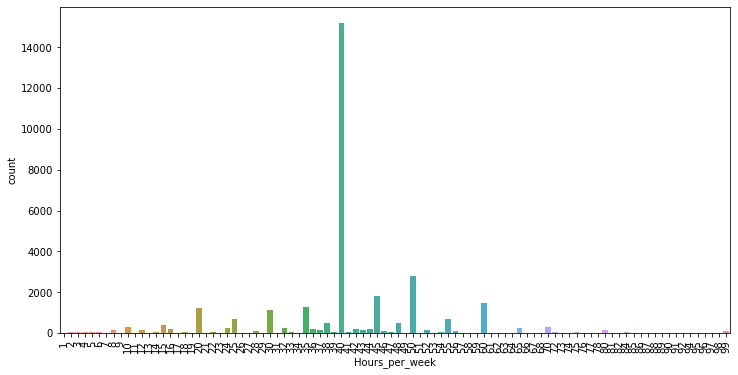

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Hours_per_week"])
plt.show()

Most of the person are working 40 hours per week, 

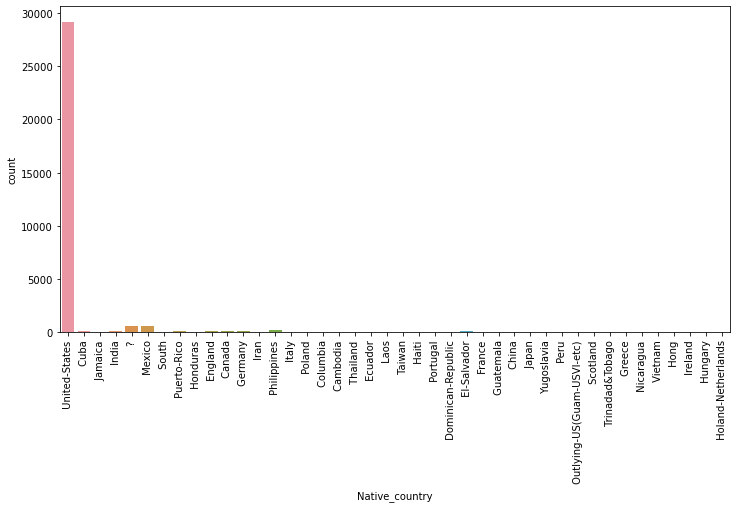

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(cen2["Native_country"])
plt.show()

Most of the persons are having their native country as United States. 

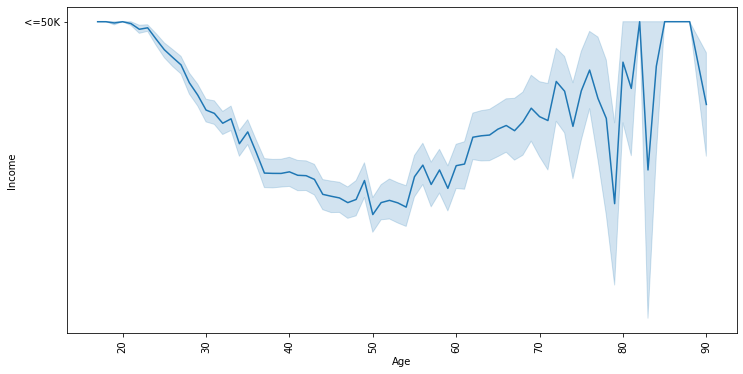

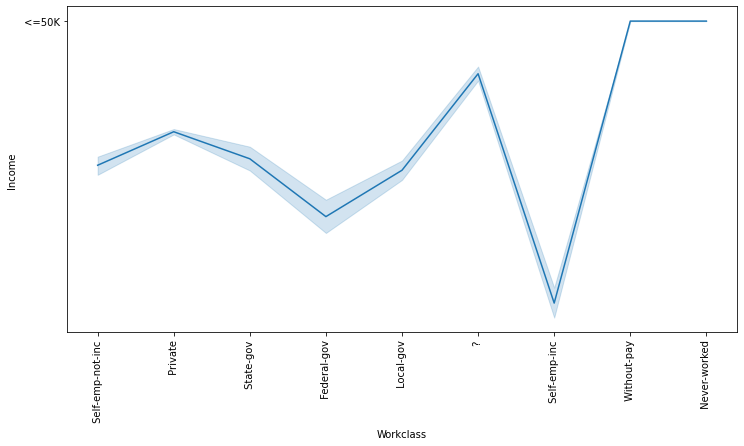

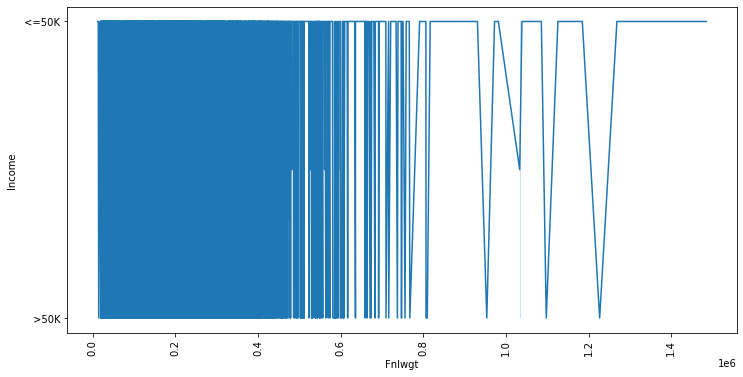

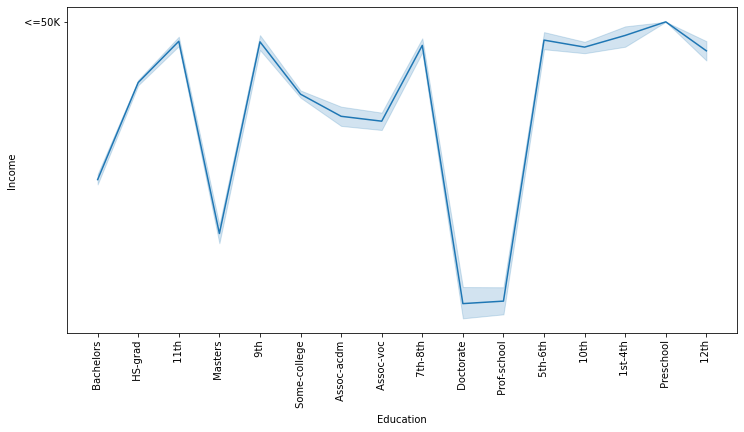

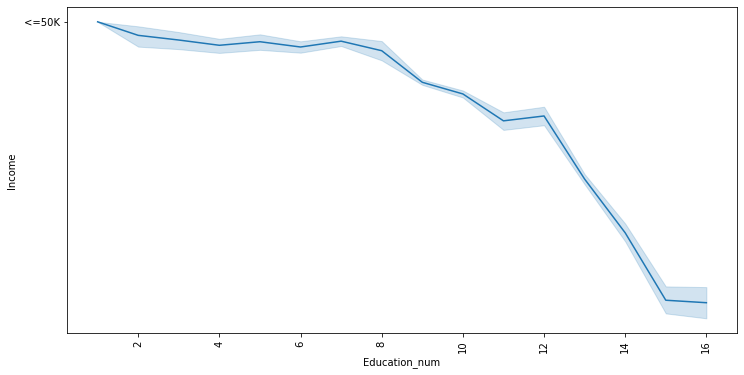

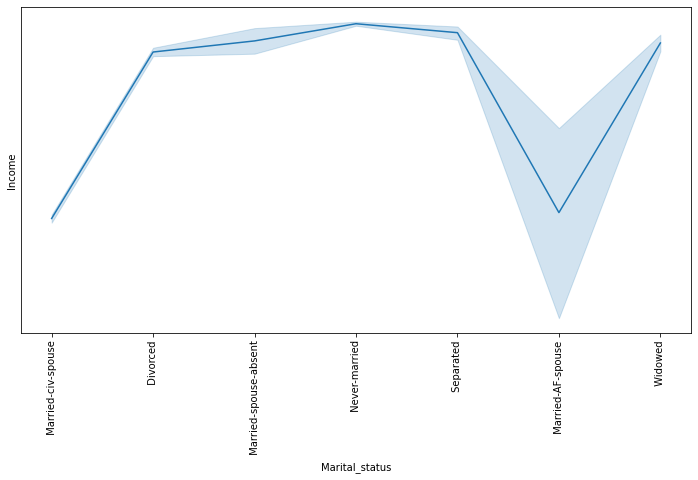

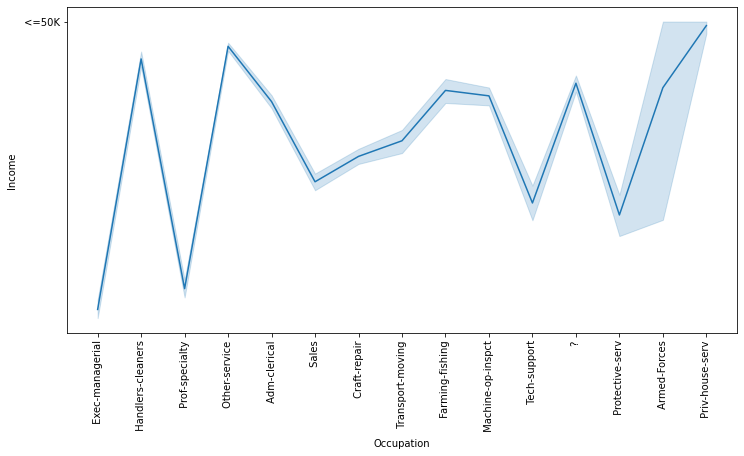

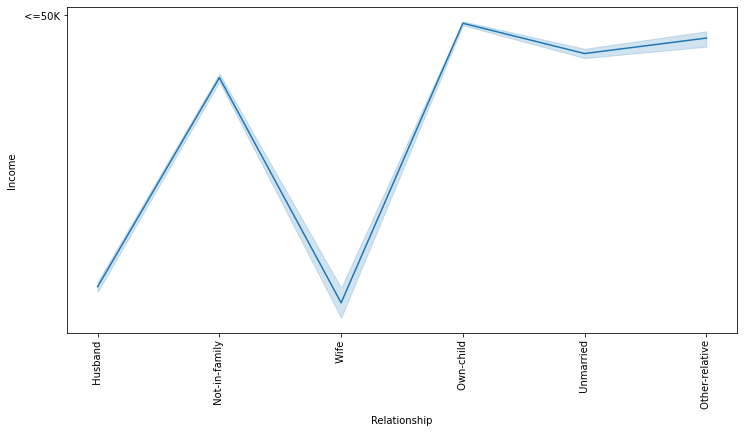

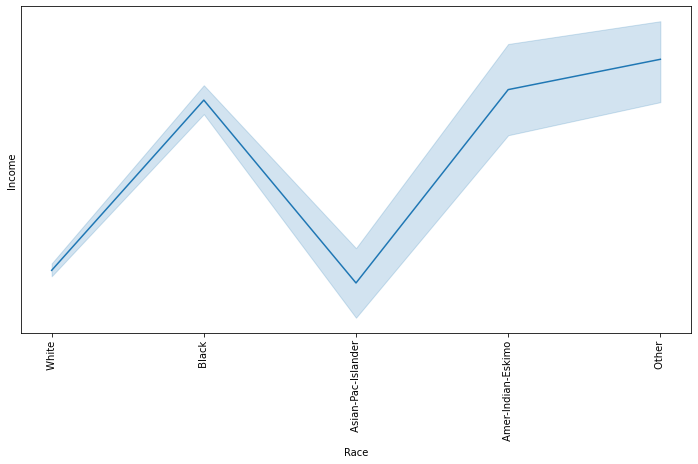

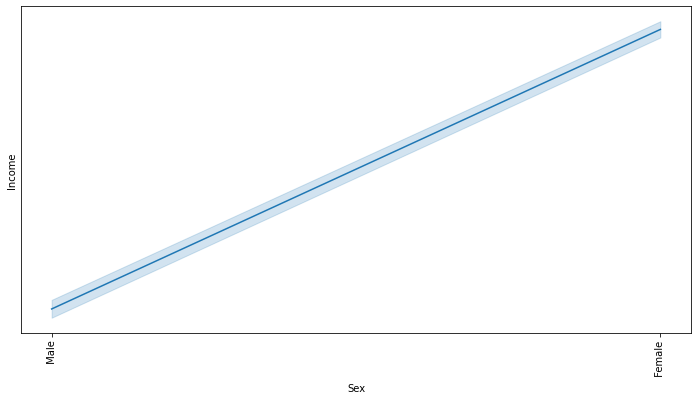

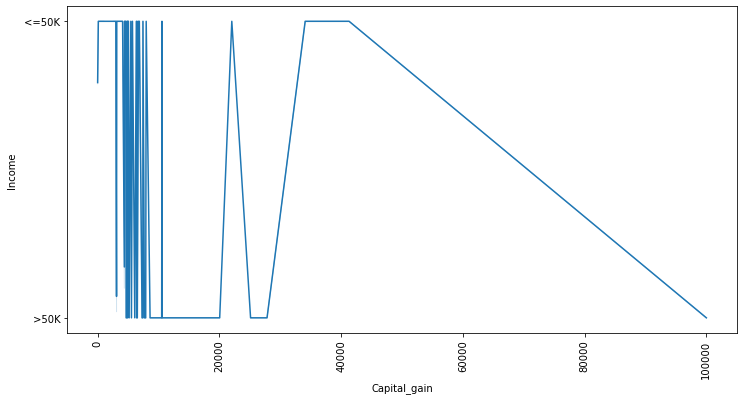

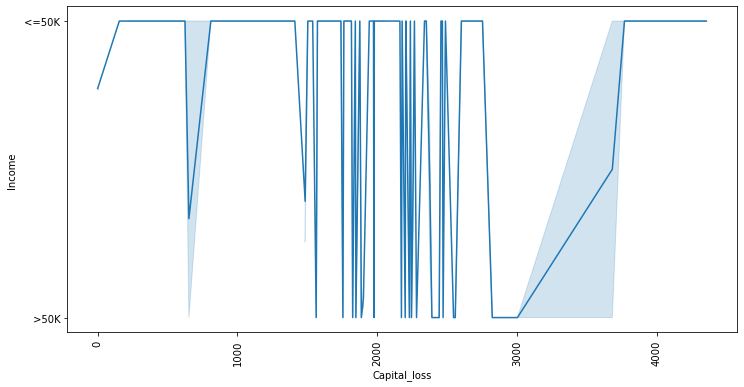

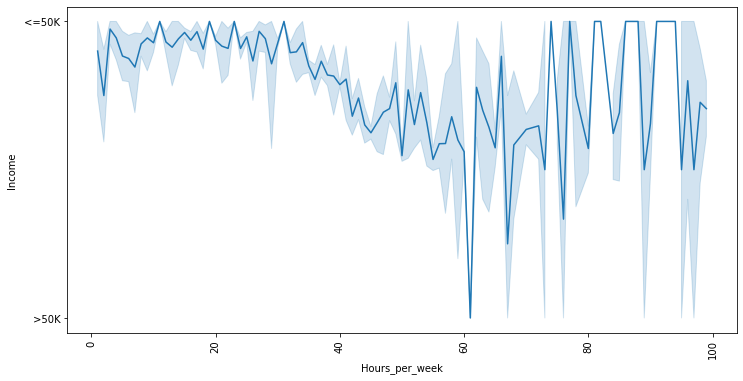

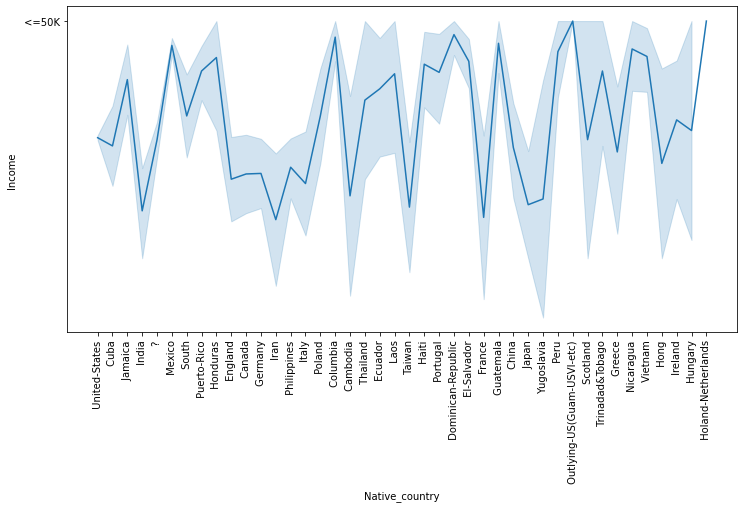

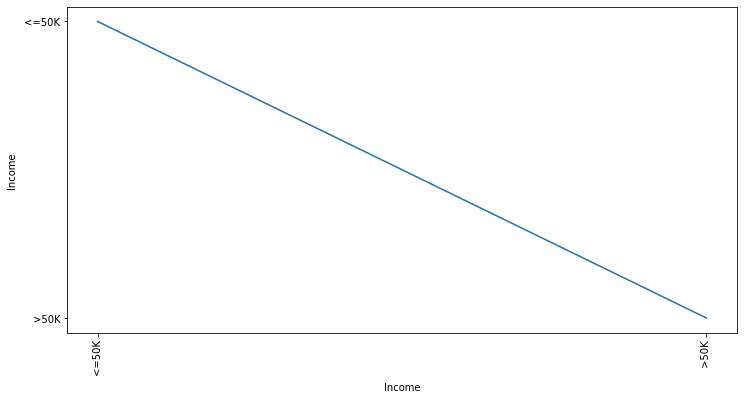

In [26]:
for i in col:
    plt.figure(figsize=(12,6))
    plt.xticks(rotation=90)
    sns.lineplot(x = i , y='Income' , data=cen2)
    plt.show()

The abive is line plot showing relations of all the columns with the label column

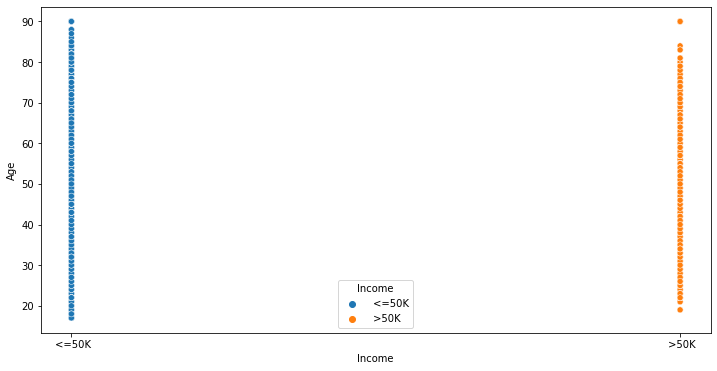

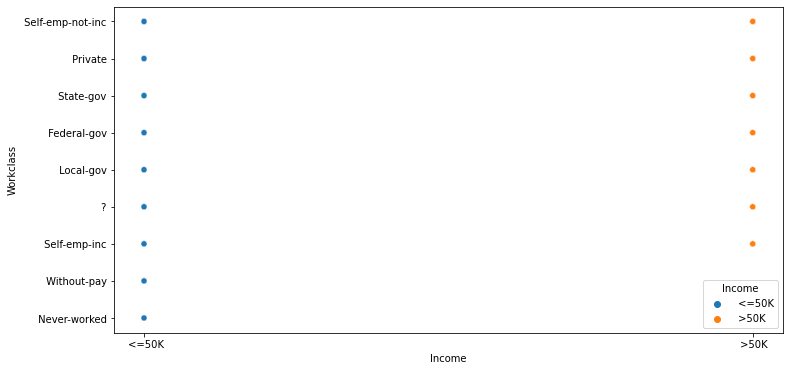

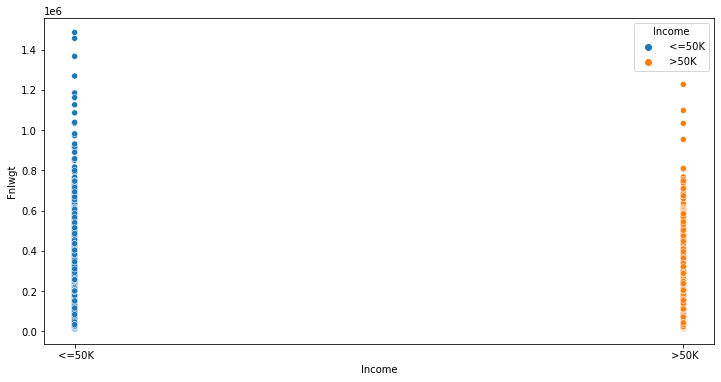

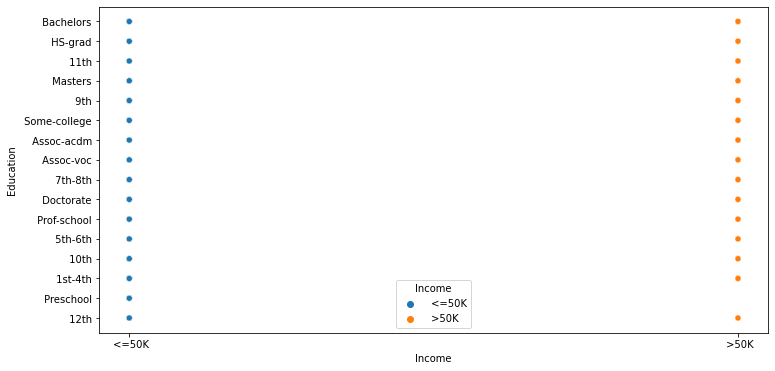

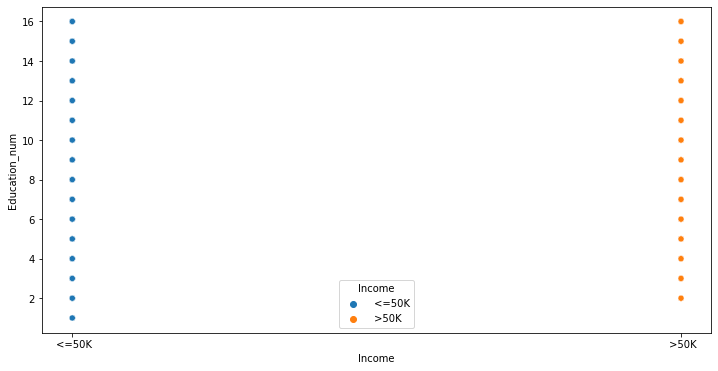

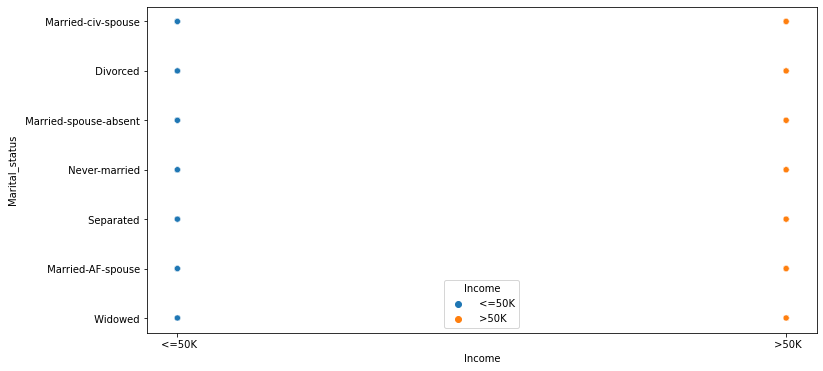

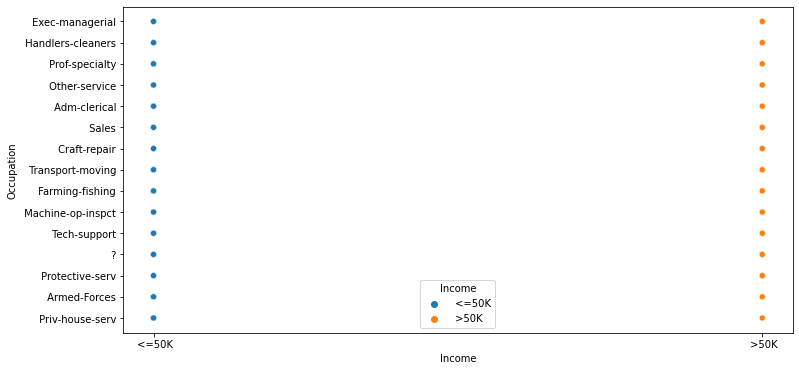

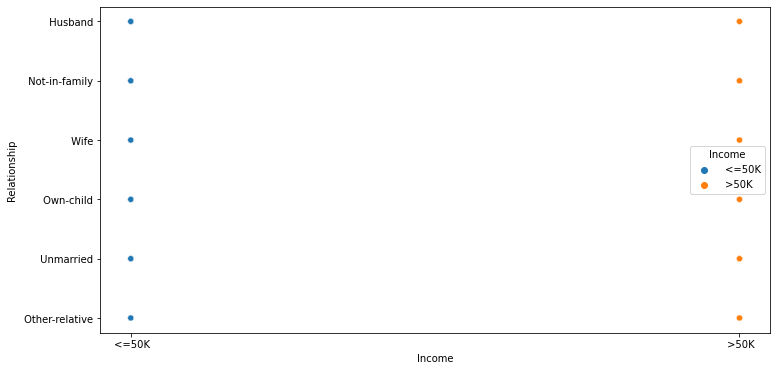

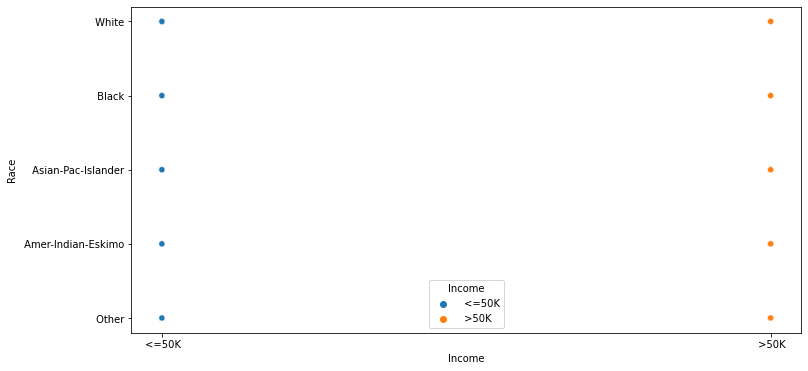

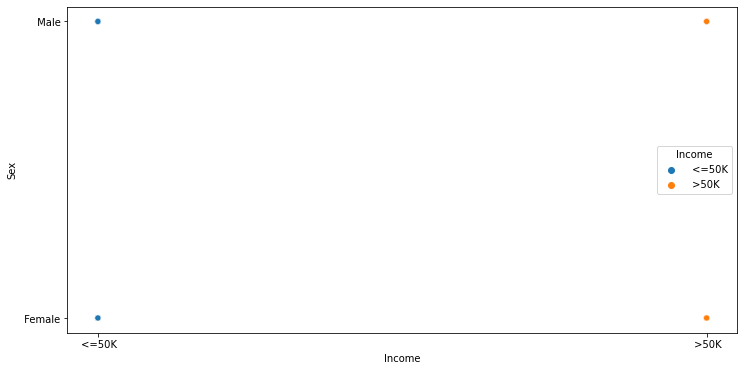

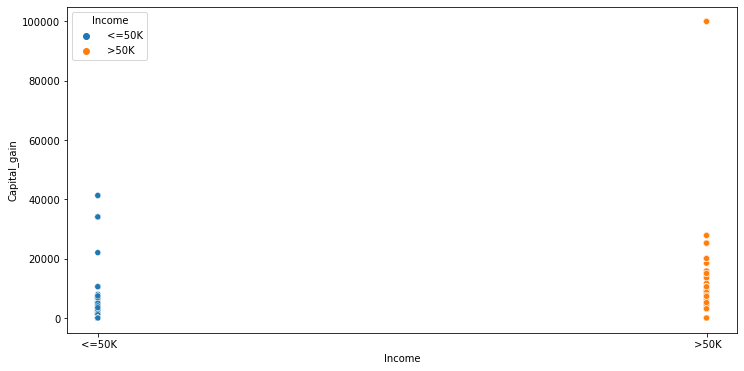

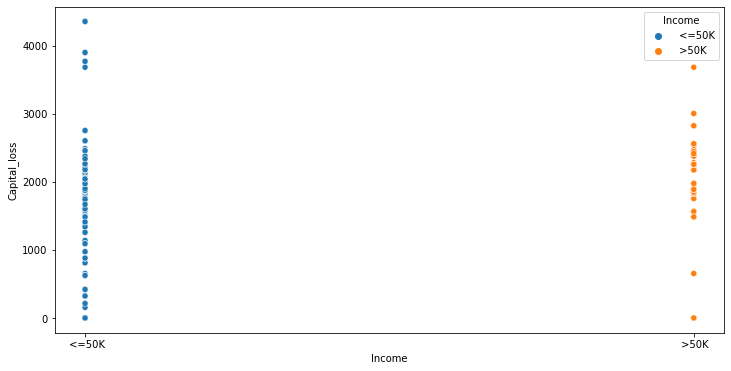

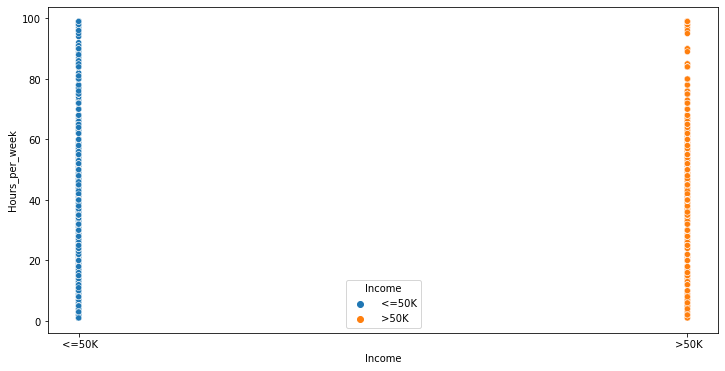

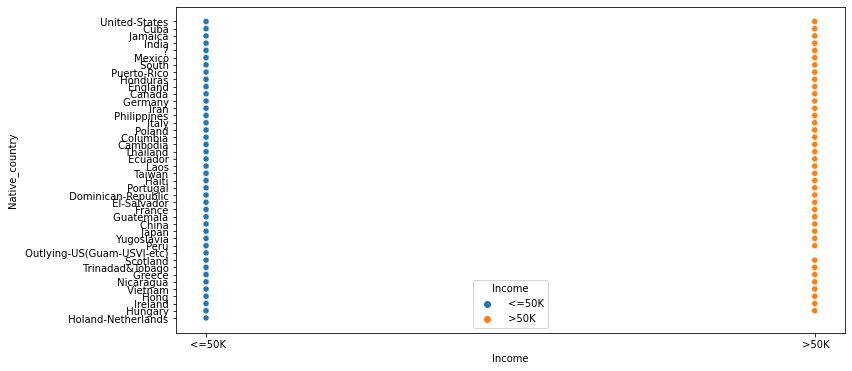

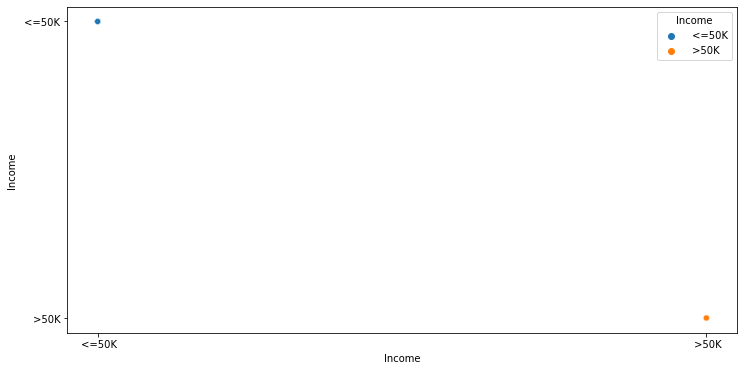

In [27]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'Income' , y = i , data = cen2, hue ='Income')
    plt.show()

Above is the scatter plot showing relation between all the columns with income columns. 

In [28]:
cen = cen2.copy()
cen.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We have copied our daatset to another variable named Cen

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in col:
    if cen[i].dtypes == 'object':
        cen[i] = label.fit_transform(cen[i])

All the columns with object dtype converted to numerical 

<Figure size 864x432 with 0 Axes>

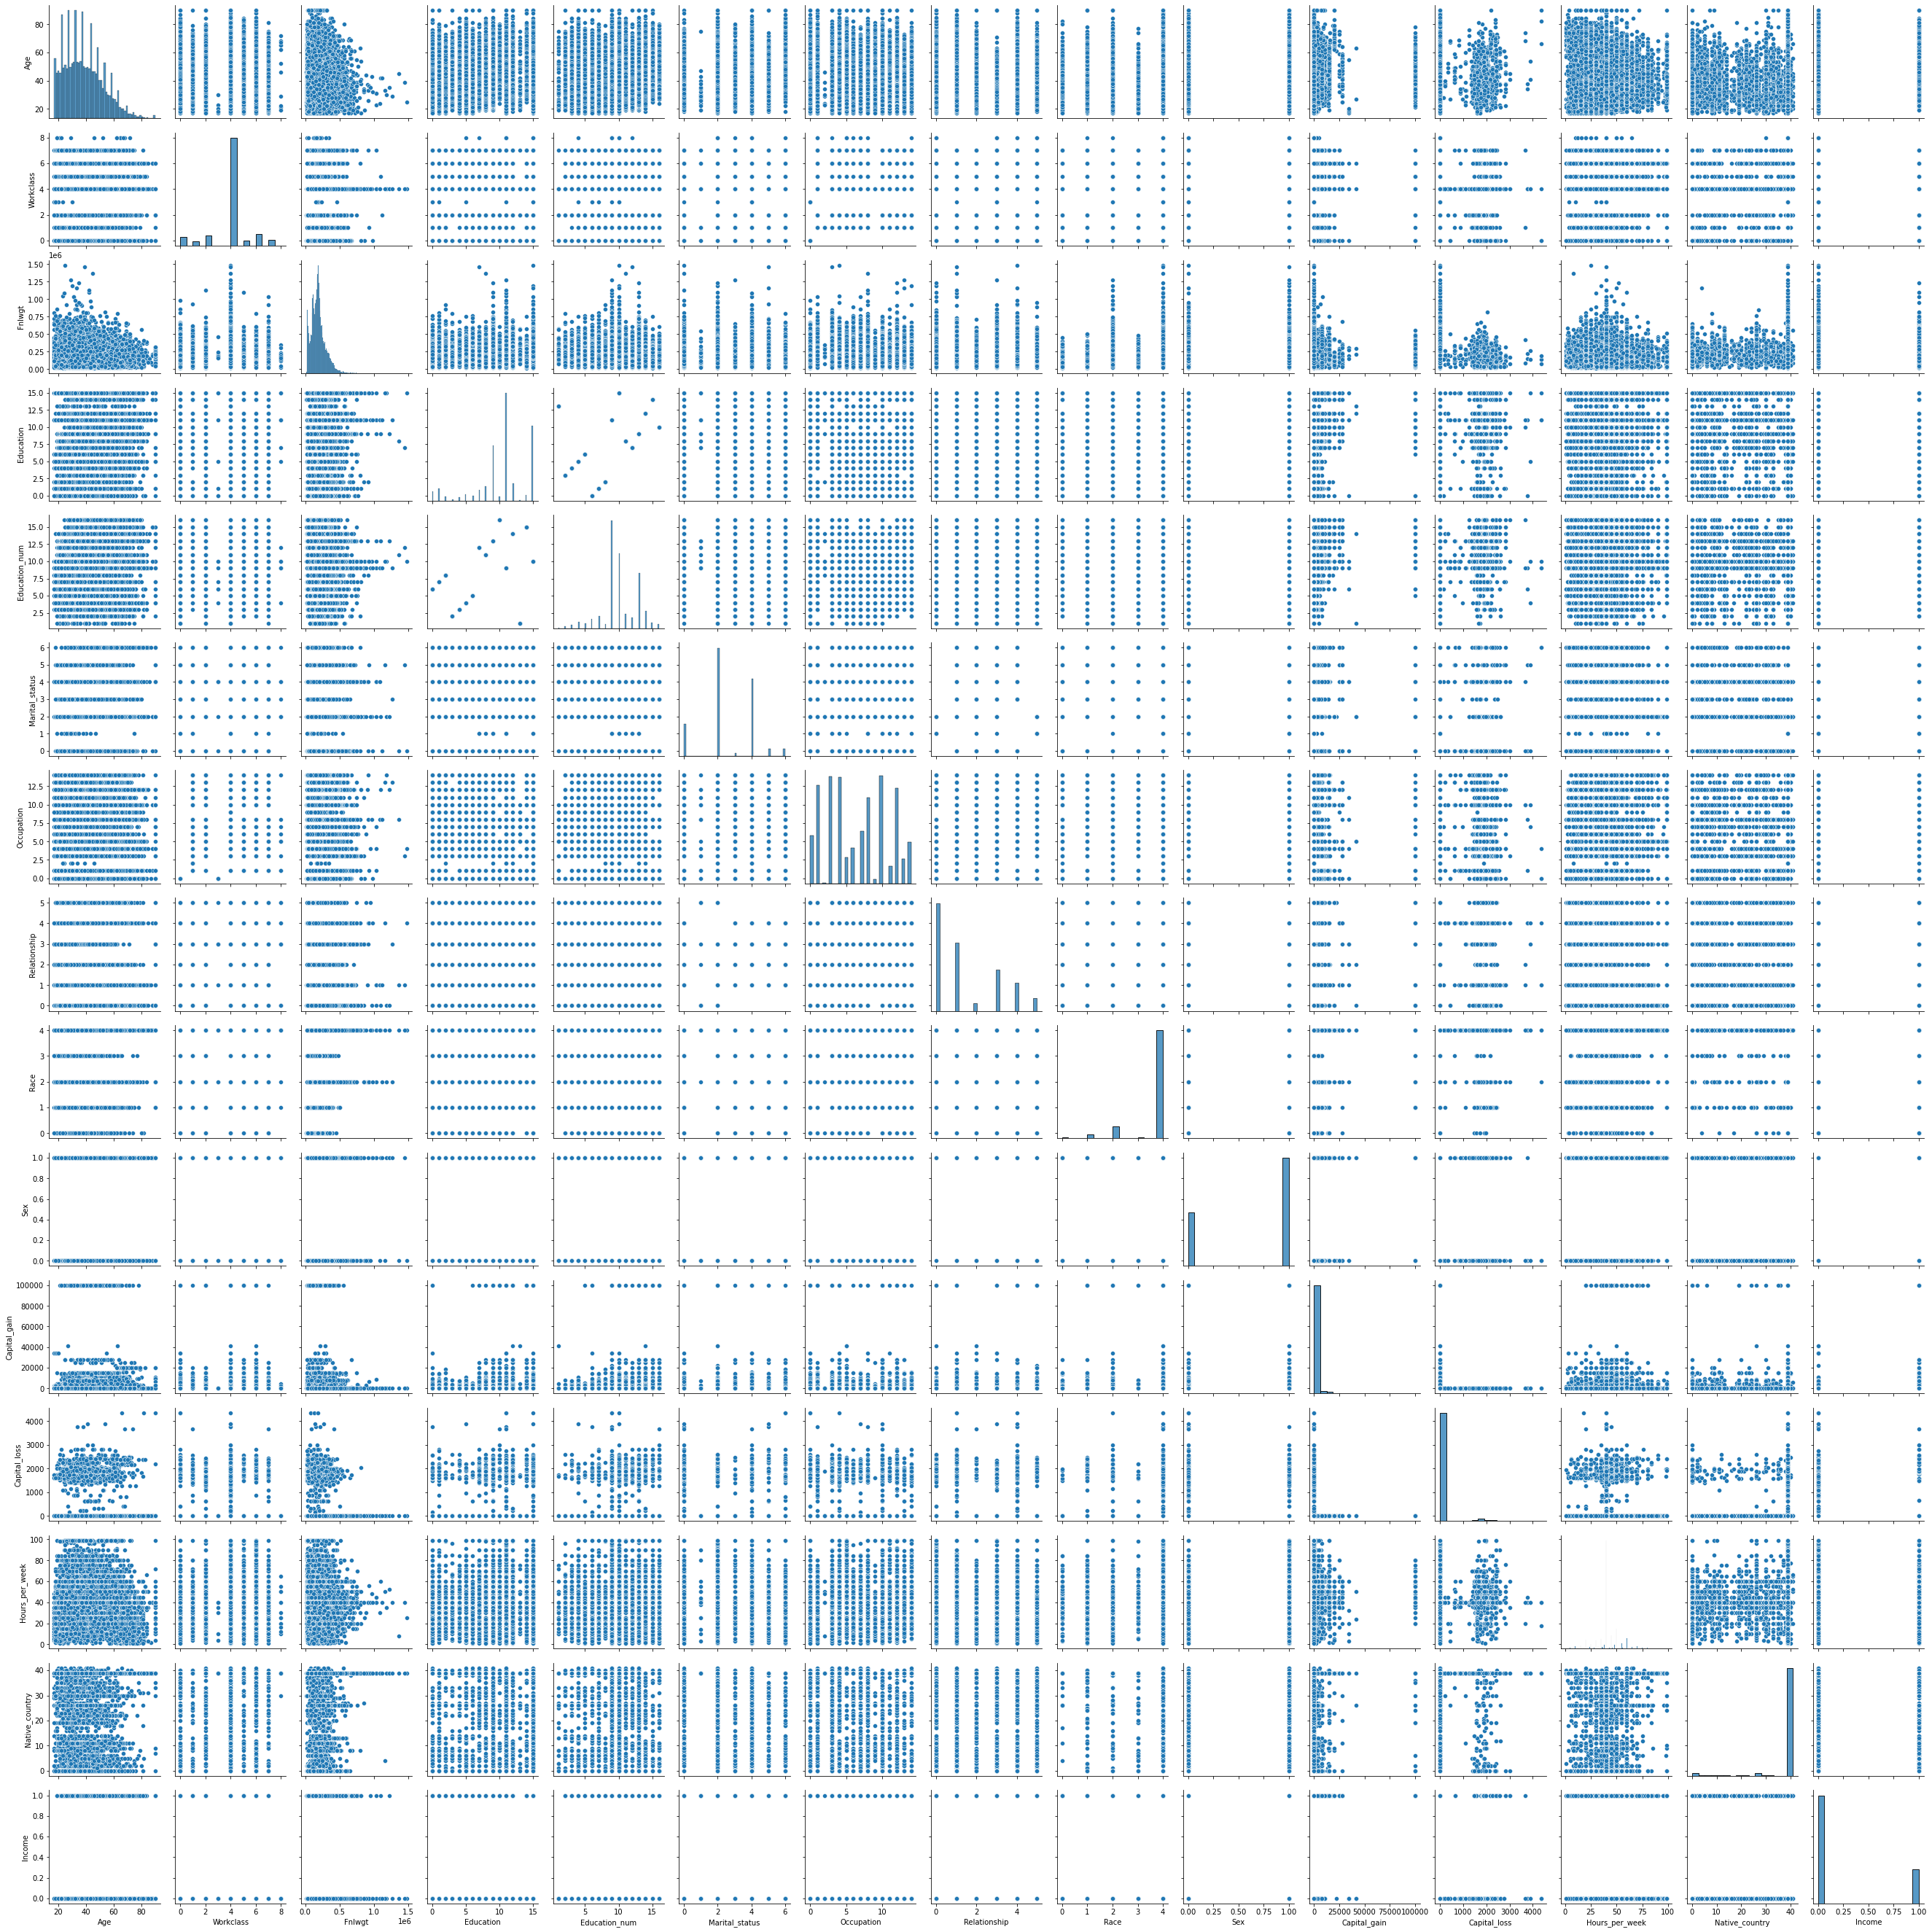

In [30]:
plt.figure(figsize = (12,6))
sns.pairplot(cen)
plt.show()

Pairplot showing relation between all the columns of the dataset. 

0.5587376395152729
Age
Column is having skewness


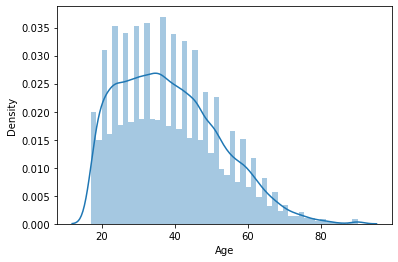

-0.7522800979115183
Workclass
Column is having skewness


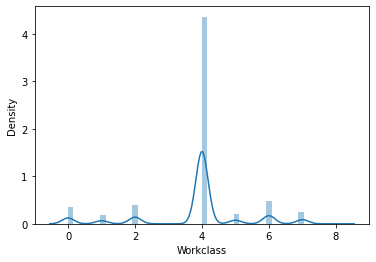

1.4469722429475549
Fnlwgt
Column is having skewness


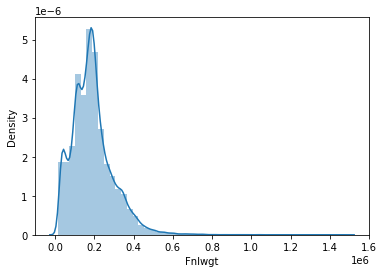

-0.9340626854679617
Education
Column is having skewness


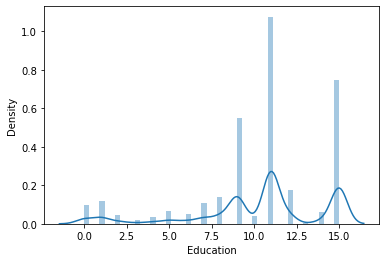

-0.31162989158397764
Education_num
No skewness is present


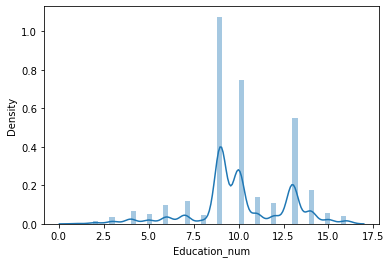

-0.013447582438725377
Marital_status
No skewness is present


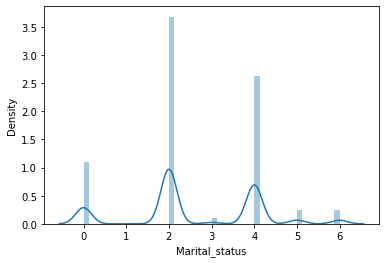

0.11453959025296633
Occupation
No skewness is present


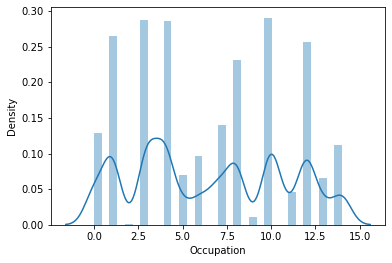

0.786783555716461
Relationship
Column is having skewness


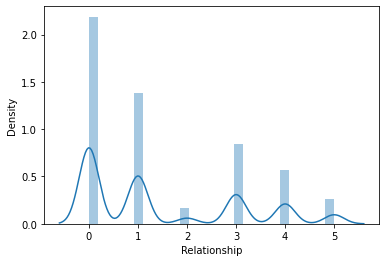

-2.435331860592106
Race
Column is having skewness


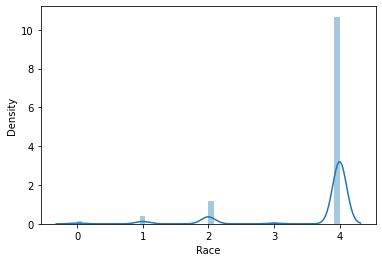

-0.7192437783111952
Sex
Column is having skewness


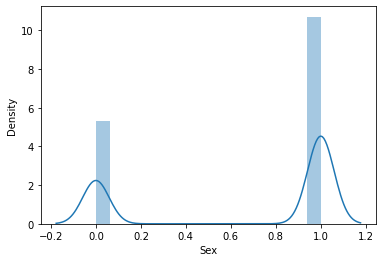

11.953689856702193
Capital_gain
Column is having skewness


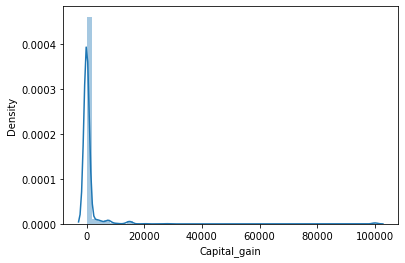

4.594548858598902
Capital_loss
Column is having skewness


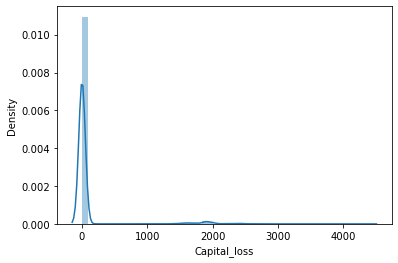

0.22763579151335658
Hours_per_week
No skewness is present


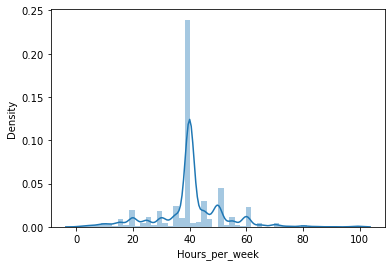

-3.6582353465427864
Native_country
Column is having skewness


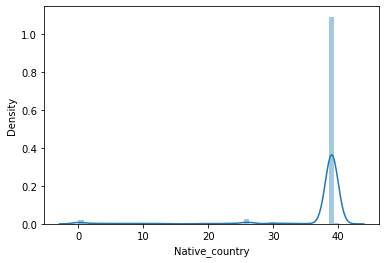

1.2123829356001685
Income
Column is having skewness


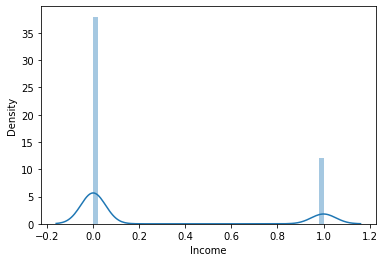

In [31]:
for i in col:
    if (cen[i].skew() > 0.55 or cen[i].skew() < -0.55): 
        print(cen[i].skew())
        print(i)
        print("Column is having skewness")
    else:
        print(cen[i].skew())
        print(i)
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(cen[i])
    plt.show()

Distribution plot form all the columns have been created to check skewness and results are shown with the graphs. 

In [32]:
cen.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

We have used skew function to check skewness in the datset. We can see that several columns have skewness present in the dataset.

In [33]:
cen.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


Numerical representation of the corelation among the columns. 

<function matplotlib.pyplot.show(close=None, block=None)>

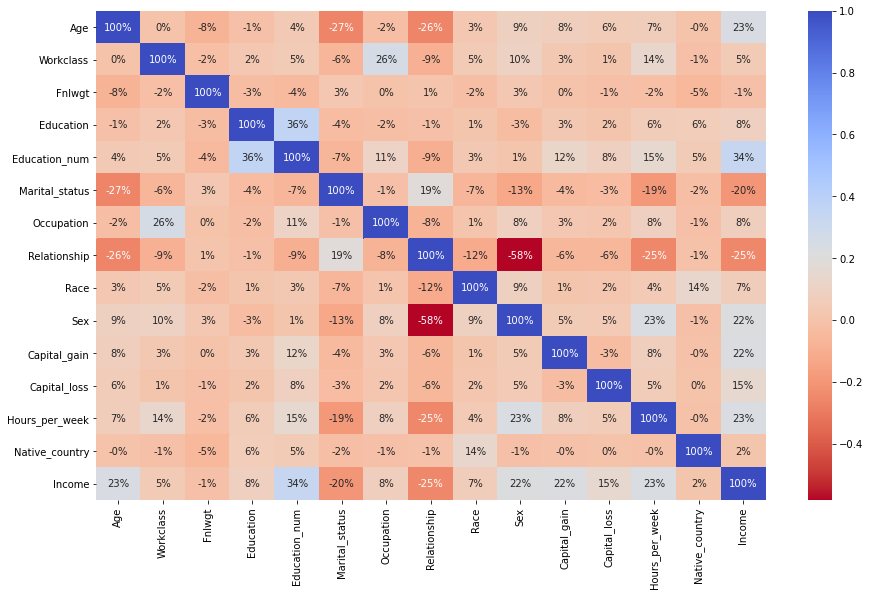

In [34]:
plt.figure(figsize=(15,9))
sns.heatmap(cen.corr(), annot=True, fmt = '.0%', cmap = 'coolwarm_r')
plt.show

Above we formed the heatmap of the dataset. We can see that:-
1. Our label income is highly corelated with sex, capital_gain, capital_loss, hours per week, education num and age. 
2. Also, education and education_num also sharing good corelation with each other. 
3. Workclass have good corewlation with the occupation. 
4. Sex have good corelation with hours per week. 
5. Marital status have good corelation woth relationship. 

We can see some relation amoong variuos columns but we don't see high corelation and can say that we don't have multicolinearity present in this dataset. 

In [35]:
cen = cen.drop("Education",axis = 1)

We have removed the education column, as it highly corelated with another column and less corelated with gthge label. 

In [36]:
cen.head(5)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


Head after removing the column

In [37]:
cen2.shape

(32560, 15)

New shape after removing the column

Age                   AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Workclass          AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Fnlwgt             AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Education_num      AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Marital_status     AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Occupation         AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Relationship       AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Race                 AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Sex               AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Capital_gain      AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
Capital_loss      AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
Hours_per_week    AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
Native_country    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
Income            AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
dtype: object

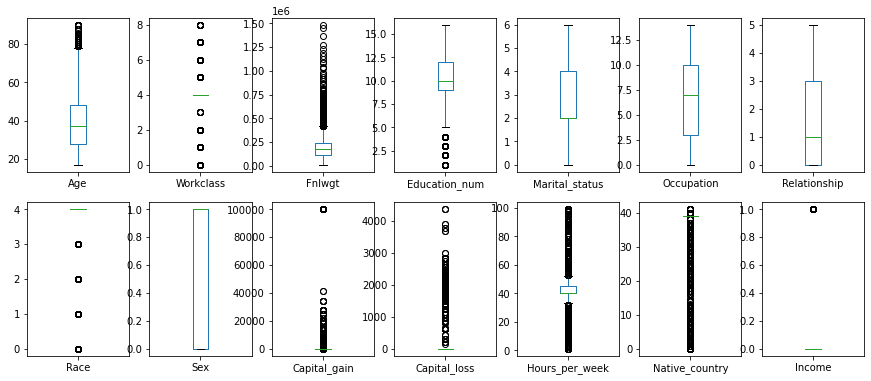

In [38]:
cen.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We can check that we are having outliers in dataset by printing a box plot for the dataset. 

In [39]:
from scipy.stats import zscore
x_zscore = np.abs(zscore(cen))
cen_new = cen[(x_zscore < 3).all(axis=1)]
print("Shape after removing putliers",cen_new.shape)

Shape after removing putliers (27417, 14)


In [41]:
cen.shape

(32560, 14)

In [42]:
data_loss=(32560-27417)/32560*100
print("Data Loss is:-",data_loss)

Data Loss is:- 15.795454545454547


We are losing approximately 15% data, hence we won't be removing outliers from our dataset and will proceed with the same. 

In [43]:
x = cen.iloc[:,0:13]
x.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,14,2,4,5,4,0,0,0,40,39


Head of our datset after assigning independant variable to x dataframe.

In [45]:
y = cen["Income"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

Head of the output after assigning independant variable to y dataframe.

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

As we already know that our dataset is not balanced as the label are imbalanbced. So, balancing datset using SMOTE. 

<AxesSubplot:xlabel='Income', ylabel='count'>

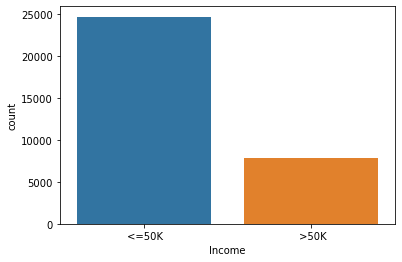

In [47]:
sns.countplot(cen2["Income"])

Labels before using smote, IMbalanced, 

<AxesSubplot:xlabel='Income', ylabel='count'>

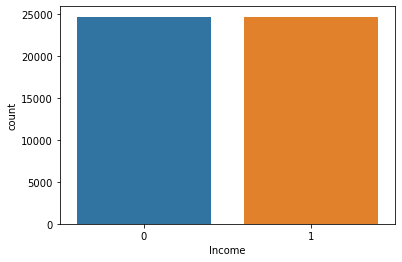

In [49]:
sns.countplot(y)

Classes are balanced. 

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

We can see that our values are different and ins ome columns the difference is very high. SO we have scaled the data to keep all the values in same scale. 

In [51]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

We have checked that our columns are skewed so we have removed the skewness using the yeo johnson method

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

We imported train test split from sklearn which will help us to split the dataset. 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

As we have to identify the class so this is a classification problem so we call all the necessatry algorithms and accuracy score to check accuracy of the model. Confusion matrix to check how may correct and wrong predications we are making. And classification report to check the other paramets like:-

1. precision
2. recall
3. f1-score
4. support

In [54]:
log = LogisticRegression()
nv = GaussianNB()
support = SVC()
knear = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()

We have assigned a variable to each of the algorithms and will proceed to buld a model. 

In [55]:
def predict_model(X):
    X.fit(x_train,y_train)
    prediction = X.predict(x_test)
    print("Details for",X,"Model :-")
    print("The accuracy score for",X,"is:-",accuracy_score(y_test,prediction)*100,'\n')
    cm = confusion_matrix(y_test,prediction)
    print("The confusion matrix for",X,"is :- \n",cm,'\n')    
    print("The classification report for",X,"is:- \n",classification_report(y_test,prediction),'\n')
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,x,y,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')
    
    print(X,'Model Score',accuracy_score(y_test,prediction)*100)
    print('Mean Score After CV',)
    print("Model Score is", accuracy_score(y_test,prediction)-cv_score.mean())
    print('\n')
    
    print("Printing the AUC/RUC curve for the model")
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    y_predict_prob = X.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=X)
    plt.xlabel('False')
    plt.ylabel('True')
    plt.title(X)
    plt.show()

In [ ]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(support)

Details for LogisticRegression() Model :-
The accuracy score for LogisticRegression() is:- 78.37108953613809 

The confusion matrix for LogisticRegression() is :- 
 [[5615 1833]
 [1375 6009]] 

The classification report for LogisticRegression() is:- 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      7448
           1       0.77      0.81      0.79      7384

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832
 



Cross Validation Score for LogisticRegression() is:- 
 [0.76011327 0.77841828 0.79379045 0.79346617 0.79124102]
Mean of Cross Validation Score for LogisticRegression() is:- 
 0.7834058395467489
Standard Deviation of Cross Validation Score for LogisticRegression() is:- 
 0.012944960969903375


LogisticRegression() Model Score 78.37108953613809
Mean Score After CV
Model Score is 0.000305055814631916


Printing the A

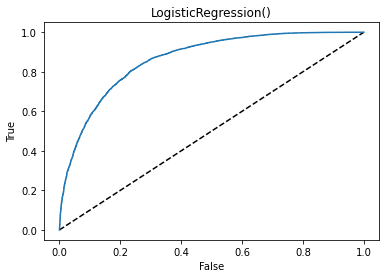

In [56]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(log)

Details for GaussianNB() Model :-
The accuracy score for GaussianNB() is:- 78.21601941747572 

The confusion matrix for GaussianNB() is :- 
 [[5833 1615]
 [1616 5768]] 

The classification report for GaussianNB() is:- 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      7448
           1       0.78      0.78      0.78      7384

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832
 



Cross Validation Score for GaussianNB() is:- 
 [0.77052994 0.78175566 0.78205906 0.7815313  0.78203702]
Mean of Cross Validation Score for GaussianNB() is:- 
 0.7795825964466432
Standard Deviation of Cross Validation Score for GaussianNB() is:- 
 0.004530505937753909


GaussianNB() Model Score 78.21601941747572
Mean Score After CV
Model Score is 0.002577597728114056


Printing the AUC/RUC curve for the model


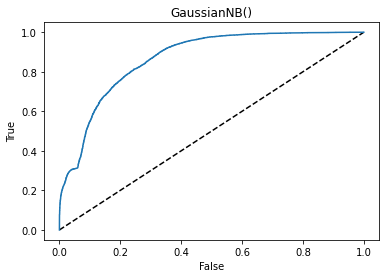

In [57]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(nv)

Details for KNeighborsClassifier() Model :-
The accuracy score for KNeighborsClassifier() is:- 84.83009708737865 

The confusion matrix for KNeighborsClassifier() is :- 
 [[6063 1385]
 [ 865 6519]] 

The classification report for KNeighborsClassifier() is:- 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7448
           1       0.82      0.88      0.85      7384

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832
 



Cross Validation Score for KNeighborsClassifier() is:- 
 [0.79925162 0.82595065 0.86134709 0.86406392 0.86588449]
Mean of Cross Validation Score for KNeighborsClassifier() is:- 
 0.8432995539728381
Standard Deviation of Cross Validation Score for KNeighborsClassifier() is:- 
 0.026488326575639754


KNeighborsClassifier() Model Score 84.83009708737865
Mean Score After CV
Model Score is 0.005001416900948352


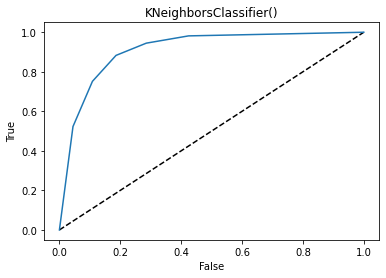

In [58]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(knear)

Details for DecisionTreeClassifier() Model :-
The accuracy score for DecisionTreeClassifier() is:- 83.41423948220064 

The confusion matrix for DecisionTreeClassifier() is :- 
 [[6166 1282]
 [1178 6206]] 

The classification report for DecisionTreeClassifier() is:- 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      7448
           1       0.83      0.84      0.83      7384

    accuracy                           0.83     14832
   macro avg       0.83      0.83      0.83     14832
weighted avg       0.83      0.83      0.83     14832
 



Cross Validation Score for DecisionTreeClassifier() is:- 
 [0.76072006 0.81614078 0.8644822  0.8673005  0.86537878]
Mean of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.8348044635775853
Standard Deviation of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.041733392802386304


DecisionTreeClassifier() Model Score 83.41423948220064
Mean Score After CV
Model Score is -0.00

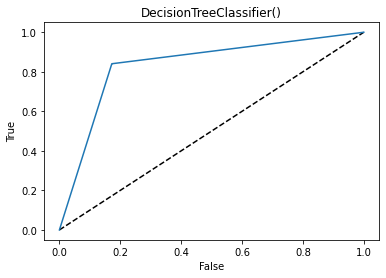

In [59]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(dec_tree)

#INPUTS: log, nv, support, knear , dec_tree
suport = SVC(probability =True)
predict_model(suport)

class sklearn.tree.DecisionTreeClassifier
*, 
criterion='gini', 
splitter='best', 
max_depth=None, 
min_samples_split=2, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, 
max_features=None, 
random_state=None, 
max_leaf_nodes=None, 
min_impurity_decrease=0.0, 
class_weight=None, 
ccp_alpha=0.0)

In [60]:
from sklearn.model_selection import GridSearchCV

parameter = [{'n_neighbors':[5,10,15,20] , 'weights' : ['uniform'], 'algorithm' : ['auto']},
            {'n_neighbors':[10,20,30,40] , 'weights' : ['distance'], 'algorithm' : ['ball_tree'], 'leaf_size':[40]},
            {'n_neighbors':[2,4,6,8,10] , 'weights' : ['uniform'], 'algorithm' : ['kd_tree']},
            {'n_neighbors':[10,20,30,40],'weights':['distance'],'algorithm':['ball_tree'],'leaf_size':[40],'p':[2],'metric':['minkowski'],'n_jobs':[-1]}]

grid_search = GridSearchCV ( estimator = knear,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(x_train,y_train)

Using Hyper parameter tuning on K neighbour model as it's giving best results. 

In [61]:
accuracy = grid_search.best_score_
accuracy

0.8504018936022032

Accuracy after grid search CV

In [62]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'n_neighbors': 10,
 'weights': 'distance'}

Best parameter for better performance of the model. 

In [63]:
import pickle
filename = 'census.pkl'
pickle.dump(knear, open(filename, 'wb'))

Saving the best model for this dataset. 